# Prosper Loan Data Analysis
##### by Rosvita Robnik

## Preliminary Wrangling

The dataset I have been investigating belongs to Prosper's peer-to-peer platform that connects borrowers and lenders. 

In [313]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [314]:
# Load the dataset into a pandas dataframe
loans_archive = pd.read_csv('prosperLoanData.csv')

In [315]:
# Make a copy of the original dataset
loans = loans_archive.copy()

In [316]:
# Visual assessment
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,...,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
81593,D00E3557447917056CE5DDF,637468,2012-09-10 12:01:02.390000000,NaN,12,Completed,2013-09-19 00:00:00,0.07371,0.0643,0.0543,0.05430,0.0149,0.03940,7.0,AA,9.0,1,DC,Attorney,Employed,1.0,False,False,NaN,2012-08-28 14:21:33,760.0,779.0,2001-10-10 00:00:00,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,18,74367,8000,2012-09-19 00:00:00,Q3 2012,A5943546263271599D20581,0.00,8280.68,8000.00,280.68,-43.65,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,143
85147,CEB83399445918084253A6A,198053,2007-09-05 22:46:19.720000000,D,36,Completed,2010-09-12 00:00:00,0.22831,0.2190,0.2090,NaN,NaN,NaN,NaN,NaN,NaN,0,MO,Clerical,Full-time,7.0,True,False,NaN,2007-08-18 08:53:50.623000000,620.0,639.0,2005-10-12 00:00:00,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19112,2000,2007-09-12 00:00:00,Q3 2007,A31633819211018213AECEB,76.28,2746.71,1999.90,746.81,-34.10,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,56
95442,FEDA348187429505102C789,455968,2010-04-27 09:50:47.733000000,NaN,36,Completed,2012-04-27 00:00:00,0.37453,0.3500,0.3400,0.18430,0.1400,0.18430,2.0,E,6.0,1,MA,Professional,Full-time,22.0,False,False,NaN,2010-04-27 09:47:43,640.0,659.0,1999-09-30 00:00:00,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,47,42071,2500,2010-04-30 00:00:00,Q2 2010,DA933483466843643D10DA4,113.09,3820.12,2499.99,1320.13,-37.72,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,76
30981,5E4E35376788531092E2513,556495,2012-02-04 16:00:35.630000000,NaN,36,Completed,2013-07-09 00:00:00,0.24246,0.2049,0.1949,0.19040,0.0890,0.10140,4.0,C,7.0,1,CA,Other,Employed,19.0,False,False,NaN,2012-02-04 16:00:31,720.0,739.0,2001-04-13 00:00:00,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,25,60278,8000,2012-02-09 00:00:00,Q1 2012,0E63353794542233601615E,299.31,9788.66,8000.00,1788.66,-87.31,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,149
27846,CFE535436757634528320AC,575137,2012-04-03 15:41:35.940000000,NaN,36,Past Due (31-60 days),NaN,0.35797,0.3177,0.3077,0.28960,0.1650,0.12460,1.0,HR,5.0,7,LA,Retail Management,Employed,11.0,False,False,NaN,2012-04-03 15:41:32,700.0,719.0,1996-08-11 00:00:00,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN,23,64044,2891,2012-04-23 00:00:00,Q2 2012,20693543471710075702259,125.55,2391.00,793.71,1597.29,-23.56,-159.44,0.0,0.0,0.0,0.7227,0,0,0.0,50
50033,A5073593851897159F34BFE,1022216,2013-11-19 10:36:21.047000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,0.25006,0.1475,0.10256,2.0,E,1.0,1,NY,Bus Driver,Employed,110.0,False,False,NaN,2013-11-19 10:36:23,640.0,659.0,2002-11-01 00:00:00,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,120765,4000,2013-12-13 00:00:00,Q4 2013,28C93698554525936C7FEEF,166.54,333.08,141.13,191.95,-6.74,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,1
62578,DEFA35636756476224DF5B1,678467,2012-11-28 11:37:41.790000000,NaN,60,Current,NaN,0.26528,0.2398,0.2298,0.21300,0.0849,0.12810,4.0,C,7.0,13,CA,Professional,Employed,69.0,True

In [317]:
# Visually check data in columns 
# (to better understand the data and to help me make a decision which variables to analyse)
col_9 = loans.loc[: , 'ListingKey':'BorrowerRate']
col_18 = loans.loc[: , 'LenderYield':'BorrowerState']
col_27 = loans.loc[: , 'Occupation':'CreditScoreRangeUpper']
col_36 = loans.loc[: , 'FirstRecordedCreditLine':'CurrentDelinquencies']
col_45 = loans.loc[: , 'AmountDelinquent':'TradesNeverDelinquent (percentage)']
col_54 = loans.loc[: , 'TradesOpenedLast6Months':'OnTimeProsperPayments']
col_63 = loans.loc[: , 'ProsperPaymentsLessThanOneMonthLate':'LoanNumber']
col_72 = loans.loc[: , 'LoanOriginalAmount':'LP_ServiceFees']
col_81 = loans.loc[: , 'LP_CollectionFees':'Investors']
display(col_9.tail(3))
display(col_18.tail(3))
display(col_27.sample(3))
display(col_36.sample(3))
display(col_45.sample(3))
display(col_54.sample(3))
display(col_63.sample(3))
display(col_72.sample(3))
display(col_81.sample(3))

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039


,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState
113934,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX
113935,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA
113936,0.0939,0.09071,0.0299,0.06081,6.0,A,7.0,1,NY


,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper
55867,Other,Employed,76.0,False,False,NaN,2013-11-17 17:00:39,700.0,719.0
69341,Sales - Retail,Employed,61.0,True,False,NaN,2013-11-21 13:05:01,660.0,679.0
7660,Professor,Employed,28.0,True,False,NaN,2011-11-25 15:04:06,700.0,719.0


,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies
101012,1999-11-08 00:00:00,33.0,33.0,56.0,22,775.0,2.0,8.0,0.0
93008,1989-09-02 00:00:00,5.0,4.0,15.0,4,96.0,0.0,0.0,0.0
17899,2005-05-28 00:00:00,6.0,6.0,7.0,5,85.0,0.0,19.0,0.0


,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage)
18838,0.0,0.0,0.0,0.0,12611.0,0.69,1172.0,34.0,1.00
45944,0.0,0.0,0.0,0.0,1130.0,0.09,10870.0,10.0,1.00
93560,0.0,0.0,0.0,0.0,6261.0,0.88,967.0,13.0,0.76


,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments
23301,1.0,0.11,"$75,000-99,999",True,8166.666667,9E9F3663444339862C14A5D,NaN,NaN,NaN
40816,0.0,0.10,"$25,000-49,999",True,2166.666667,DB2B3643017912851EF3A7E,NaN,NaN,NaN
76098,0.0,0.06,"$75,000-99,999",True,6333.333333,E0AE3654998672550B64961,NaN,NaN,NaN


,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber
96565,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123041
93843,NaN,NaN,NaN,NaN,NaN,355,16.0,24,62253
14977,NaN,NaN,NaN,NaN,NaN,0,NaN,7,100127


,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees
33260,1000,2007-01-03 00:00:00,Q1 2007,616D3376128182414D053BE,31.11,1008.77,1000.00,8.77,-0.58
77601,9390,2011-06-27 00:00:00,Q2 2011,8889351680408575015FB8A,222.89,7132.48,4136.04,2996.44,-201.10
53187,2100,2006-11-28 00:00:00,Q4 2006,15013369610455922F70E63,88.00,1605.98,823.74,782.24,-13.24


,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
54859,0.0,0.0,0.0,0.0,1.0,0,0,0.0,169
40643,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
101492,0.0,0.0,0.0,0.0,1.0,0,0,0.0,42


In [318]:
# Programmatic assessment
print(loans.duplicated().sum())

0


In [319]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [320]:
# Convert variables' types


In [321]:
# Improve columns' names
loans.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
loans.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [322]:
# Descriptive statistics for numeric variables
pd.set_option('display.max_columns', 61)
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,

### What is the structure of your dataset?

> The data set contains 113,937 loans with 81 variables on each loan, that are related to loan details (e.g. interest rate, amount, length, etc.), borrowers' data (e.g. occupation, home-ownership, credit rating, etc.) and some other kind of data (e.g. number of investors for a loan).

### What is/are the main feature(s) of interest in your dataset?

> I would like to get a better picture, whether I could possibly get a cheap loan, and on the other hand what yield I can expect as a lender, taking into consideration especially risk. As a potential lender, I am also curious for what purposes people raise loans and what is their background.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that I will find some strong correlations, e.g. the better borrower's credit rating the lower interest rate, and from the lender's perspective, the lower risk the lower yield.

## Univariate Exploration

> Firstly, I would like to see some general information about loans and borrowers.

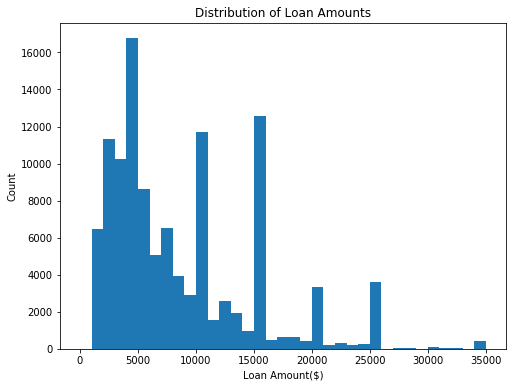

In [323]:
plt.figure(figsize = [8, 6])
bin_size = 1000
bin_edges = np.arange(0, loans['LoanOriginalAmount'].max() + bin_size, bin_size)
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Amount($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.show()

The borrowed amount starts at as little as 1000 USD and the highest one is 35k. The average loan is 8337 USD and the median is calculated at 6500 USD. The most borrowers, over 16000 of them, raised the loan in amount of 4000 USD. Further most frequent loan amounts are 16k, 11k and 3k.

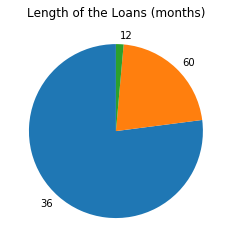

In [324]:
length = loans['Term'].value_counts()
plt.pie(length, labels = length.index, startangle = 90)
plt.title('Length of the Loans (months)');

There are only three lengths of loans - 12, 36 and 60 months. More than three quarters are of the length 36 months and less than one quarter represents loans in duration of 60 months. 

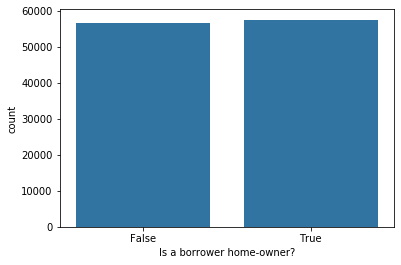

In [325]:
base_colour = sb.color_palette()[0]
sb.countplot(data = loans, x = 'IsBorrowerHomeowner', color = base_colour)
plt.xlabel('Is a borrower home-owner?');

Somehow I expected any other result but a draw. In other words, this result encourage me to investigate further relationship of this fact with other variables, perhaps the borrowed amount, or a purpose of the loan, or maybe occupation?

My next insights are where the borrowers come from, what kind of job they do and for what purposes they raised a loan.

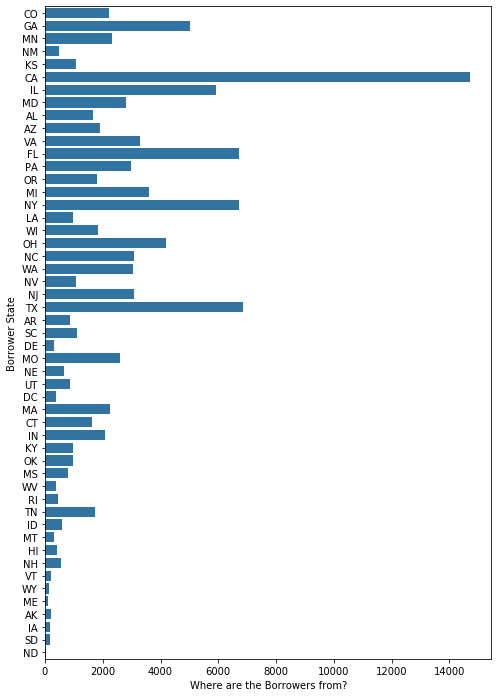

In [326]:
plt.figure(figsize = [8, 12])
base_colour = sb.color_palette()[0]
sb.countplot(data = loans, y = 'BorrowerState', color = base_colour)
plt.ylabel('Borrower State')
plt.xlabel('Where are the Borrowers from?');

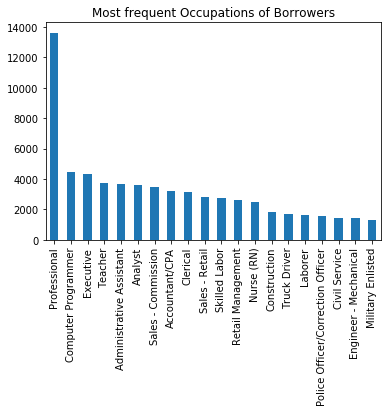

In [327]:
loans_occupation = loans[loans.Occupation.str.contains("Other") == False]
loans_occupation.Occupation.value_counts().nlargest(20).plot(kind ='bar')
plt.title('Most frequent Occupations of Borrowers');

In [328]:
#

Agenda:
0 = Not Available        7 = Other                14 = Large Purchases
1 = Debt Consolidation   8 = Baby&Adoption        15 = Medical/Dental
2 = Home Improvement     9 = Boat                 16 = Motorcycle
3 = Business            10 = Cosmetic Procedure   17 = RV
4 = Personal Loan       11 = Engagement Ring      18 = Taxes
5 = Student Use         12 = Green Loans          19 = Vacation
6 = Auto                13 = Household Expenses   20 = Wedding Loans


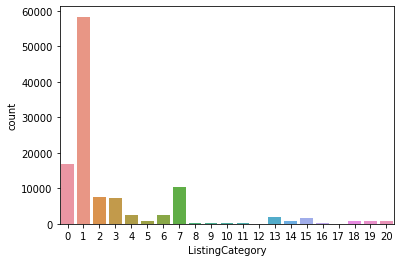

In [329]:
sb.countplot(data = loans, x = 'ListingCategory');
print('Agenda:')
print('0 = Not Available        7 = Other                14 = Large Purchases')
print('1 = Debt Consolidation   8 = Baby&Adoption        15 = Medical/Dental')
print('2 = Home Improvement     9 = Boat                 16 = Motorcycle')    
print('3 = Business            10 = Cosmetic Procedure   17 = RV')
print('4 = Personal Loan       11 = Engagement Ring      18 = Taxes')
print('5 = Student Use         12 = Green Loans          19 = Vacation')
print('6 = Auto                13 = Household Expenses   20 = Wedding Loans')

I somehow expected that lots of borrowers would come from California. But twice as many than from New York, Florida or Texas? <br>
None of the occupations does not stand out; the "Professional" can contain many different professions. <br>
My wish to figure out what are the purposes of loans almost led to dead end - in the dataset, the purpose means are expressed as integer numbers and the agenda is explained in the enclosed document. My solution to graphically display it is definitely not sophisticated, however, I can clearly see that the purpose number one is not promising for a potential lender.

Exploring borrowers' background by now did not produce results that would convience a potential lender to invest money this way, I think. Therefore I shall continue the univariate exploration to reveal some more facts about borrowers: employment status, income range and ratings.

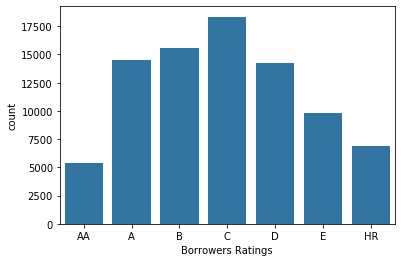

In [330]:
ratings_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = ratings_order)
loans['ProsperRating'] = loans['ProsperRating'].astype(ordered_cat)
base_colour = sb.color_palette()[0]
sb.countplot(data = loans, x = 'ProsperRating', color = base_colour)
plt.xlabel('Borrowers Ratings');

In [331]:
#loans.IncomeRange.value_counts()
loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

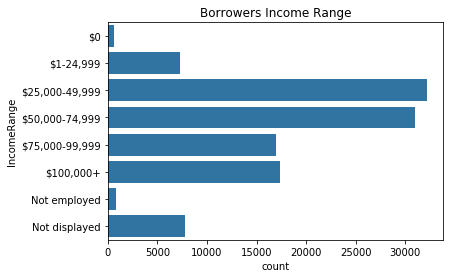

In [332]:
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
ordered_cat2 = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_cat2)
base_colour = sb.color_palette()[0]
sb.countplot(data = loans, y = 'IncomeRange', color = base_colour)
plt.title('Borrowers Income Range');

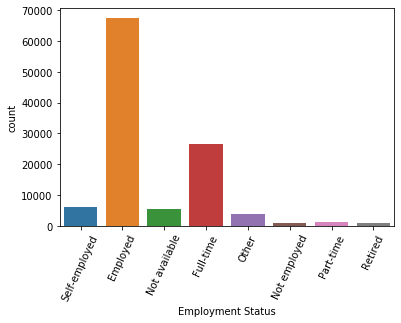

In [333]:
#loans.EmploymentStatus.value_counts()
sb.countplot(data = loans, x = 'EmploymentStatus')
plt.xticks(rotation = 65)
plt.xlabel('Employment Status');

The distribution of borrowers'rating is roughly simmetrical - the most of the borrowers have an average rating (AA is the best rating and HR the worst one). <br>
The income range of the borrowers indicates that most of them belong either to the range between 25k and 50k or to the range between 50k and 75k, both of the groups with a count over 30k. Two groups with a similar count - approx. 17k - follow, borrowers that earn either between 75k and 100k or over 100k. <br>
The insight into the employment status shows - in my opinion - one expected and one unexpected outcome. The majority represents employed people (on the chart the Employed and Full-time categories), as expected. But for the self-employed category I would expect a higher share among borrowers. <br>
<br>
The last univariate exploration shall be a quick look into a lender's yield:

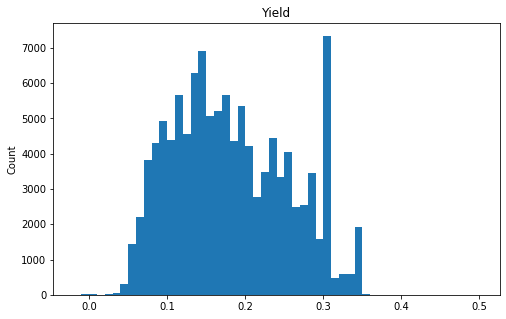

In [334]:
plt.figure(figsize = [8, 5])
bin_size2 = 0.01
bin_edges2 = np.arange(-0.02, loans['LenderYield'].max()+ bin_size2, bin_size2)
plt.hist(data = loans, x = 'LenderYield', bins = bin_edges2)
plt.ylabel('Count')
plt.title('Yield')
plt.show();

The histogram shows that yield is extremely high, mostly over 10%, with the highest count at over 30%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My univariate investigation reveals some unusual points. From my point of view, the most frequent purpose to raise a loan, a debt consolidation, is rather surprising, so the loan's purpose seems tempting to investigate further. A few hundreds of borrowers suppose to have no income. The yield is extremely high. The exploration definitely requires a deep look into relationships between variables. <br>
Plotting histograms, I have adapted bin sizes and bin edges. At the bar charts I have changed variables into category type and ordered them.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> So far I did not notice any unusual distribution. <br>
I have change names of the columns, which I used in the exploration and they have spaces in their names, to e.g. easily use the methods like .value_counts. 

## Bivariate Exploration

> Continuing with relationships between two variables, my prime choice is the yield.

Agenda:
0 = Not Available        7 = Other                14 = Large Purchases
1 = Debt Consolidation   8 = Baby&Adoption        15 = Medical/Dental
2 = Home Improvement     9 = Boat                 16 = Motorcycle
3 = Business            10 = Cosmetic Procedure   17 = RV
4 = Personal Loan       11 = Engagement Ring      18 = Taxes
5 = Student Use         12 = Green Loans          19 = Vacation
6 = Auto                13 = Household Expenses   20 = Wedding Loans


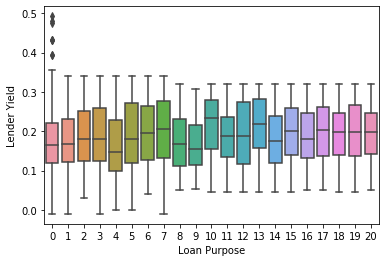

In [335]:
sb.boxplot(data = loans, x = 'ListingCategory', y = 'LenderYield')
plt.xlabel('Loan Purpose')
plt.ylabel('Lender Yield')
print('Agenda:')
print('0 = Not Available        7 = Other                14 = Large Purchases')
print('1 = Debt Consolidation   8 = Baby&Adoption        15 = Medical/Dental')
print('2 = Home Improvement     9 = Boat                 16 = Motorcycle')    
print('3 = Business            10 = Cosmetic Procedure   17 = RV')
print('4 = Personal Loan       11 = Engagement Ring      18 = Taxes')
print('5 = Student Use         12 = Green Loans          19 = Vacation')
print('6 = Auto                13 = Household Expenses   20 = Wedding Loans')

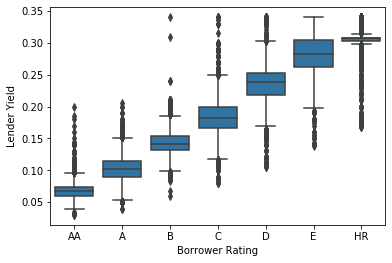

In [336]:
base_colour = sb.color_palette()[0]
sb.boxplot(data = loans, x = 'ProsperRating', y = 'LenderYield', color = base_colour)
plt.xlabel('Borrower Rating')
plt.ylabel('Lender Yield');

The average yield slightly differ according to the loan purpose. The span of the yield is the longest for undefined purposes, debt consolidation, business, personal and student use. The highest yield average belongs to the loans for cosmetic procedures. There are some outliers - extremely high yield - for the loans, where a purpose is not available. <br>
A relationship between the lender yield and borrower rating is linear - the average yield raises with the risk. However, there are a lot of outliers; even the AA rate can bring the yield over 20%. <br>
<br>
Next, I shall check if the number of investors has an influence on the lender yield:

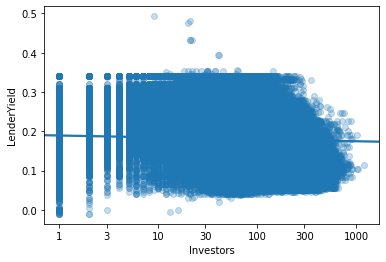

In [349]:
def log_trans (x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(loans['Investors'].apply(log_trans), loans['LenderYield'], scatter_kws = {'alpha' : 1/4})
tick_locs = [1, 3, 10, 30, 100, 300, 1000]
plt.xticks(log_trans(tick_locs), tick_locs);

The scatterplot shows that number of investors has no impact on the lenders' yield. <br>
<br>
Based on the previous investigation, I would like to confirm that the lenders' yield and borrowers' rate must be in a strong positive correlation:

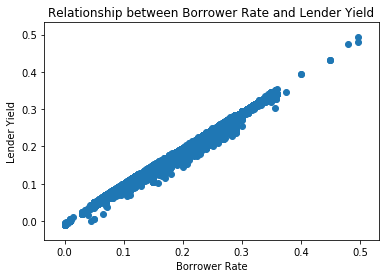

In [354]:
plt.scatter(data = loans, x = 'BorrowerRate', y = 'LenderYield')
plt.xlabel('Borrower Rate')
plt.ylabel('Lender Yield')
plt.title('Relationship between Borrower Rate and Lender Yield');

Since there is a strong correlation between the lenders' yield and borrowers' rate, I can use any of them to explore further what else determines them. <br>

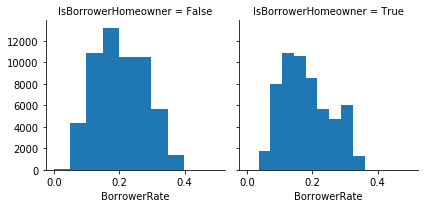

In [372]:
g = sb.FacetGrid(data = loans, col = 'IsBorrowerHomeowner');
g.map(plt.hist, 'BorrowerRate');

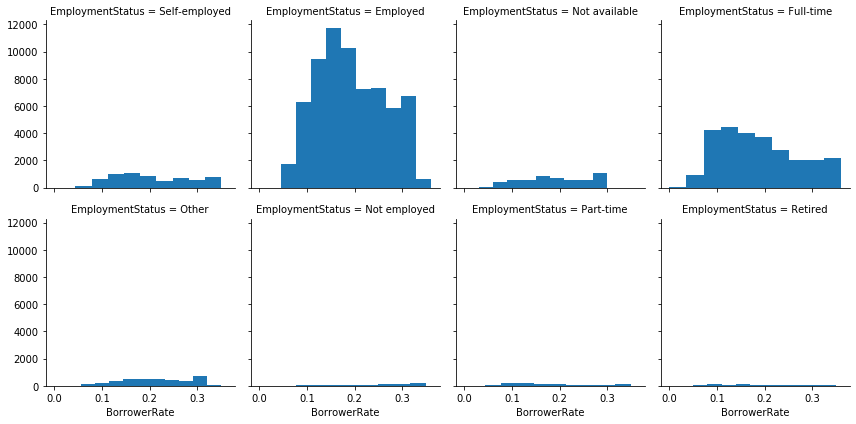

In [375]:
g = sb.FacetGrid(data = loans, col = 'EmploymentStatus', col_wrap = 4);
g.map(plt.hist, 'BorrowerRate');

Home-ownership practically has no impact to the borrower's rate. <br>
The employment status also shows an insignificant impact to the borrower's rate. There is only a barely seen tendency that the borrowers with employment status "not available" or "not employed" might pay higher interest. <br>
<br>
What is the relationship between borrowers' income range and their ratings shall be my next exploration:

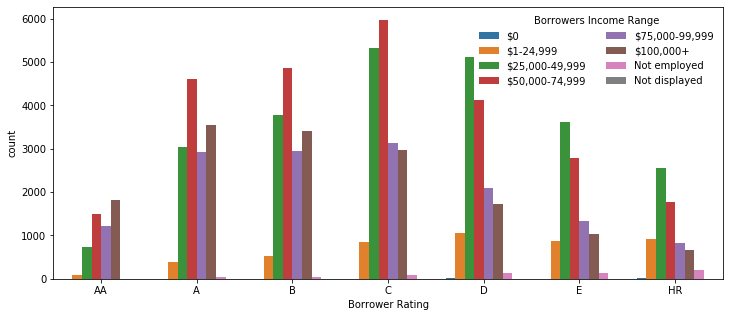

In [405]:
plt.figure(figsize = [12, 5])
ax = sb.countplot(data = loans, x = 'ProsperRating', hue = 'IncomeRange')
ax.legend(loc = 0, ncol = 2, framealpha = 0, title = 'Borrowers Income Range')
plt.xlabel('Borrower Rating');

Relationship between borrowers' income range and their rating shows some extremes, eg not just a few borrowers with an income over 100k have the worst rating, and there are borrowers with an income less than 25k that have the rating A or B. <br>
<br>
I shall wrap the bivariate exploration up with the questions if the loan amount is related to the borrower's rating, and what is the relationship between the loan amount and borrower's interest rate.

In [421]:
loans['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

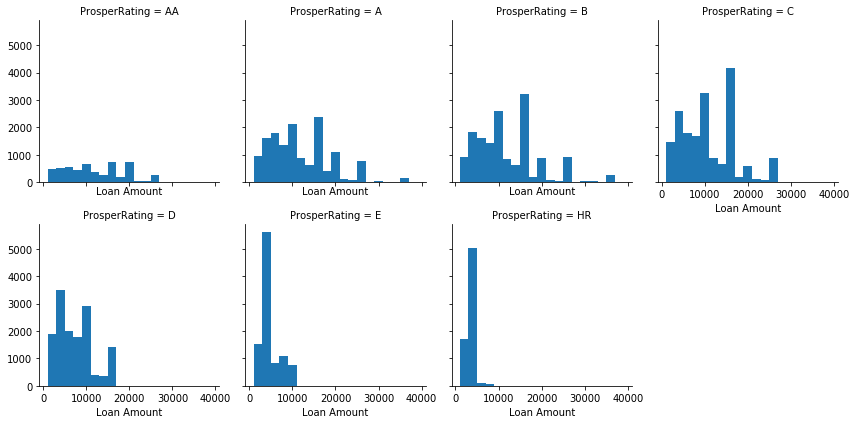

In [435]:
bins = np.arange(1000, 35000+5000, 2000)
g = sb.FacetGrid(data = loans, col = 'ProsperRating', col_wrap = 4);
g.map(plt.hist, 'LoanOriginalAmount', bins = bins);
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel('Loan Amount');

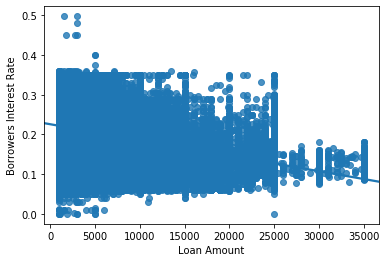

In [426]:
sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerRate');
plt.xlabel('Loan Amount')
plt.ylabel('Borrowers Interest Rate');

The loan amount is definitely related to the borrower's rating; it is clearly seen that borrowers with the worst two ratings raise loans under 10k, mostly in amount between 3k and 5k. Loans in amounts over 30k can be found inside A and B ratings, but not inside the best rating. <br>
Interestingly, with the amount raising the interest rate slightly falls.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My main features of interest were the lender's yield and risk. Since the yield and borrower's rate are strongly correlated, investigating the interest rate indirectly answers what is the impact on the yield.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers' income range in relationship with their ratings at some points shows less expected outcome, like borrowers with income over 100k and the worst rating.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!